In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

from ast import literal_eval
pd.set_option('display.max_columns', None)

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)
# data_df = data_df.drop(columns = data_df.columns[0], axis = 1)
data_df

/root/miniconda3/envs/introDS/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3194: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Name,Kingdom,Phylum,Subphylum,Class,Order,Suborder,Family,Genus,Species,Population size,Life span,Top speed,Weight,Height,Length,Biome,Climate,Mating behavior,Reproduction season,Pregnancy duration,Baby carrying,Independent age,Female name,Male name,Baby name,Incubation period,Population trend,Population status,Attributes,Continents,Subcontinents,Countries,Regions,Wwf biomes,Group name,Diet,Biogeographical realms,Lifestyle,Seasonal behavior,BC_min,BC_max
0,Grey Wolf,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Canidae,Canis,Canis lupus,"400,000",15.0,75.0,38.0,82.5,132.5,"['Wetlands ', 'Shrubland', 'Forest', 'Mountain...","['Temperate', 'Cold', 'Polar', 'Tropical']",Monogamy,January-April,60-63 days,1-14 pups,45 days,bitch,dog,"pup, whelp",NaN,Stable,Least concern (LC),"['Nocturnal', 'Carnivore', 'Scavenger', 'Terre...","['Asia', ' Europe', ' North America', ' Africa']","['South Asia', ' Western Asia', ' Southeast As...","['Albania', ' Armenia', ' Azerbaijan', ' Belar...","['Czech Republic', ' Estonia', ' Finland', ' F...","['Nearctic', ' Palearctic', ' Indomalayan', ' ...","['pack', ' route', ' rout']","['Carnivore', '', 'Scavenger']",['Greenland'],"['Terrestrial', ' Cursorial', ' Altricial', ' ...",['Not a migrant'],NaN,NaN
1,Tiger,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Feliformia,Felidae,Panthera,Panthera tigris,"2,154-3,159",12.5,96.0,185.5,NaN,295.0,"['Forest', 'Rainforest', 'Montane forest', 'Ri...","['Tropical', 'Temperate']",Polygyny,November-April,103 days,1-7 cubs,18 mos-3 yrs,NaN,NaN,cub,NaN,Decreasing,Endangered (EN),"['Nocturnal', 'Carnivore', 'Cursorial', 'Terre...",['Asia'],"['South Asia', ' Southeast Asia', ' East Asia']","['Bangladesh', ' Bhutan', ' China', '', ' Indi...",['Thailand'],"['Palearctic', ' Indomalayan']",[],['Carnivore'],"['Tibet', ' Yunnan']","['Cursorial', ' Terrestrial', ' Ambush predato...",['Not a migrant'],NaN,NaN
2,Brown Bear,Animalia,Chordata,Vertebrata,Mammalia,Carnivora,Caniformia,Ursidae,Ursus,Ursus arctos,"200,000",35.0,56.0,367.5,111.5,210.0,"['Forest', 'Woodland']","['Temperate', 'Cold', 'Polar']","Polygynandry,",May-July,8 weeks,1-4 cubs,2-4 years,sow,boar,cub,NaN,Stable,Least concern (LC),"['Crepuscular', 'Omnivore', 'Terrestrial', 'Al...","['Asia', ' Europe', ' North America']","['South Asia', ' Western Asia', ' East Asia', ...","['Albania', ' Armenia', ' Austria', ' Azerbaij...",[],"['Nearctic', ' Palearctic', ' Indomalayan']","['sloth', ' sleuth']",['Omnivore'],"['Estonia', ' Finland', ' France', ' Georgia',...","['Terrestrial', ' Altricial', ' Nomadic', ' Te...","['Hibernating', ' Migrating']",NaN,NaN
3,Blue Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Balaenopteridae,Balaenoptera,Balaenoptera musculus,10-25 Thou,85.0,20.0,130000.0,NaN,2750.0,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",Monogamy,winter or early spring,1 year,1 calf,8 months,cow,bull,calf,NaN,Increasing,Endangered (EN),"['Carnivore', 'Piscivores', 'Aquatic', 'Precoc...","['Africa', ' South America', ' Oceania', ' Nor...","['Sub-Saharan Africa', ' Caribbean Islands', '...","['Angola', ' Argentina', ' Australia', ' Baham...","['Chile', ' China', ' Colombia', ' Comoros', '...",[],"['pod', ' gam', ' herd', ' school', ' mod']","['Carnivore', '', 'Piscivores']","['Atlantic Ocean', ' Pacific Ocean']","['Aquatic', ' Precocial', ' Natatorial', ' Viv...",['Migrating'],NaN,NaN
4,Killer Whale,Animalia,Chordata,Vertebrata,Mammalia,Artiodactyla,NaN,Delphinidae,Orcinus,Orcinus orca,"50,000",65.0,45.0,4500.0,NaN,750.0,"['Oceanic pelagic zone', 'Marine', 'Neritic zo...","['Tropical', 'Temperate', 'Cold', 'Polar']",Polygynandry,"year-round, usually in summer",15-18 months,1 calf,2 years,cow,bull,calf,NaN,NaN,Data deficient (DD),"['Diurnal', 'Carnivore', 'Aquatic', 'Precocial...","['Africa', ' Oceania', ' Antarctica', ' North ...","['North Africa', ' Caribbean Islands', ' South...","['Algeria', ' Antigua', 'Barbuda', ' Argentina...","['Brun

In [3]:
def try_eval(inp):
    try:
        return literal_eval(inp)
    except:
        return []


for i in data_df:
    if type(data_df[i][0]) == str and data_df[i][0][0] == "[":
        data_df[i] = data_df[i].apply(try_eval)

Câu hỏi 1: Loài nào có nhiều động vật nhất? Tương tự với lớp (class), bộ (order), họ (family), chi (Genus) ?

In [4]:
Species_count = data_df.value_counts('Species')
Genus_count = data_df.value_counts('Genus')
Family_count = data_df.value_counts('Family')
Order_count = data_df.value_counts('Order')
Class_count = data_df.value_counts('Class')
Species_count.iloc[:5]

Species
Arctocephalus pusillus     2
Ovis orientalis            2
Origma robusta             1
Orientocoluber spinalis    1
Orienthella fogata         1
dtype: int64

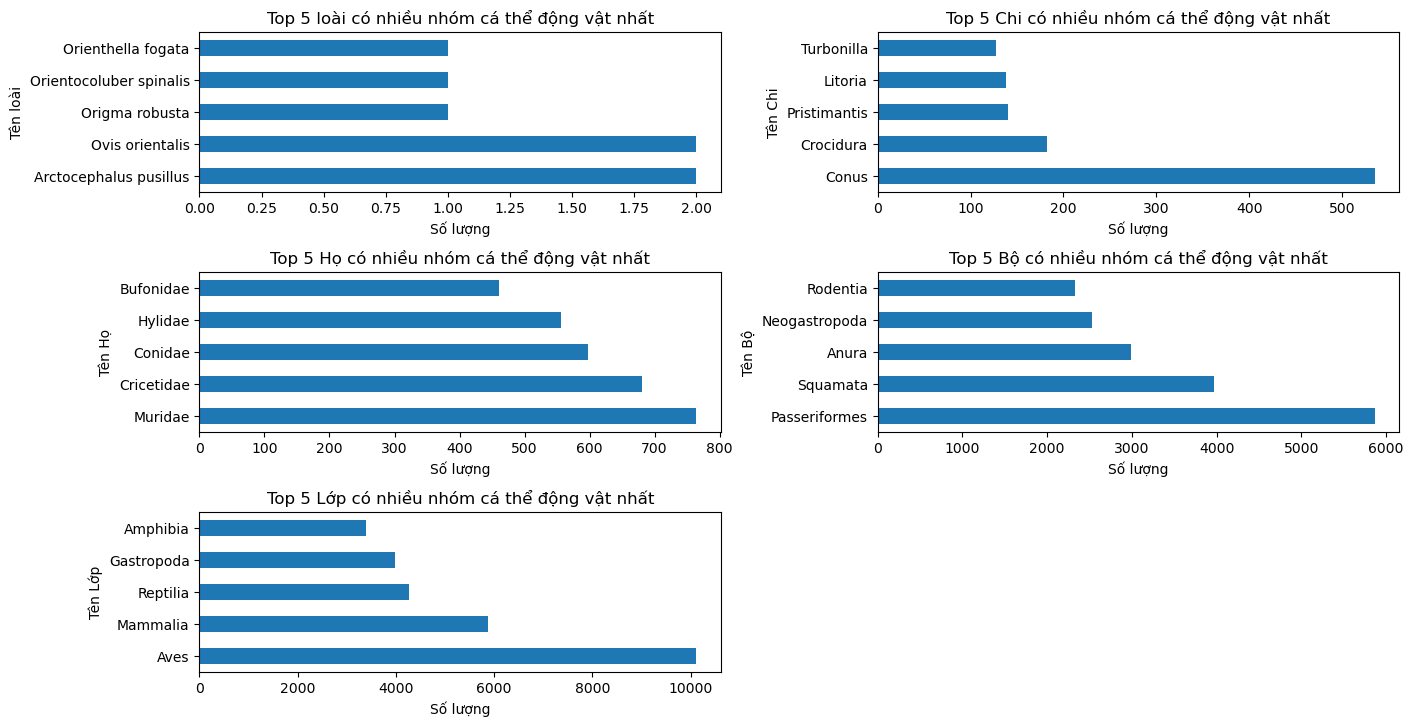

In [5]:
def draw_plot(ax, s, title, xlabel, ylabel):
    s.iloc[:5].plot.barh(ax = ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
fig, axes = plt.subplots(3, 2, figsize = (15, 8))
draw_plot(axes[0, 0], Species_count, 'Top 5 loài có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên loài')
draw_plot(axes[0, 1], Genus_count, 'Top 5 Chi có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên Chi')
draw_plot(axes[1, 0], Family_count, 'Top 5 Họ có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên Họ')
draw_plot(axes[1, 1], Order_count, 'Top 5 Bộ có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên Bộ')
draw_plot(axes[2, 0], Class_count, 'Top 5 Lớp có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên Lớp')
axes[2][1].set_visible(False)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

Nhìn chung thì **số lượng nhóm cá thể động vật** trong từng lớp (Class) nhiều hơn trong từng bộ (Order).
Và tương tự, Bộ (Order) nhiều hơn Họ (Family), Họ (Family) nhiều hơn Chi (Genus), Chi (Genus) nhiều hơn Loài (species).

Điều này là hợp lí vì theo lý thuyết phân loại sinh học thì bậc giảm dần phân loại là Lớp -> Bộ -> Họ -> Chi -> Loài.
Một bậc bất kỳ thì bao gồm các bậc ít chung chung hơn mô tả cụ thể hơn về các dạng sống. Bên trên nó có các bậc sinh vật chung chung hơn. Thường thì chỉ cần Loài với Chi là đủ để xác định một sinh vật cụ thể nào đó.

Trả lời cho câu hỏi 1:
- Loài có số lượng nhóm cá thể động vật nhiều nhất: Arctocephalus pusillus (2) và Ovis orientalis (2)
- Chi có số lượng nhóm cá thể động vật nhiều nhất: Conus (535)
- Họ có số lượng nhóm cá thể động vật nhiều nhất: Muridae (764)
- Bộ có số lượng nhóm cá thể động vật nhiều nhất: Passeriformes (5863)
- Lớp có số lượng nhóm cá thể động vật nhiều nhất: Aves (10114)

## Xét lớp thú, xem xét mối quan hệ giữa tốc độ với chiều dài, cân nặng, chiều cao.

Vì các lớp khác có dữ liệu về chiều dài, cân nặng, chiều cao chưa được đầy đủ nên chúng em chỉ xét đến lớp thú.
Câu hỏi 2: Liệu rằng có phải do động vật đó có chiều cao, chiều dài và cân nặng lớn thì sẽ chạy chậm hay không ? Hay những con vật có kích thước nhỏ gọn hơn sẽ có tốc độ chạy nhanh hơn ?

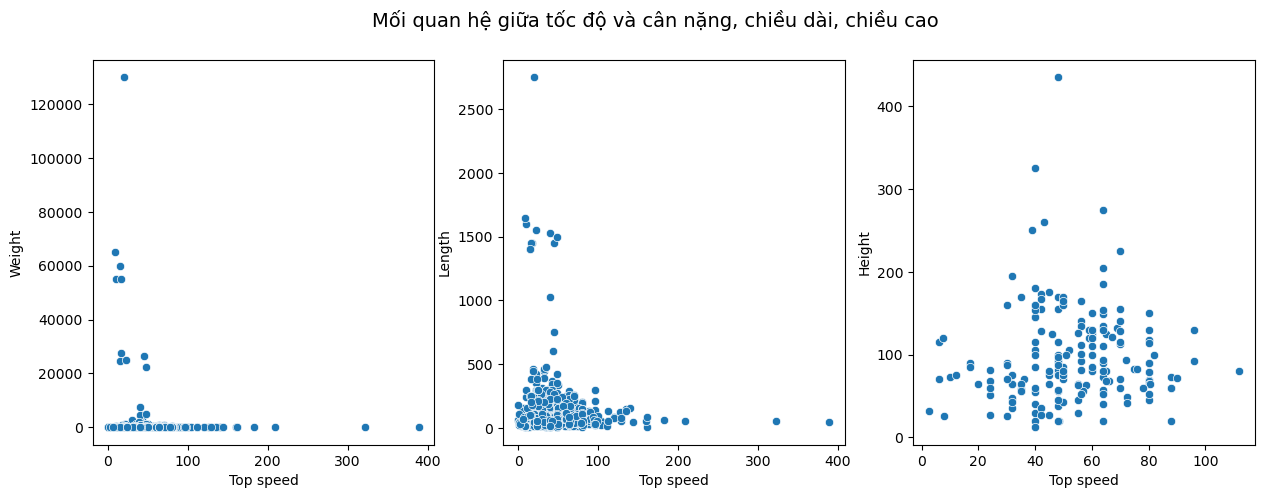

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.scatterplot(ax = axes[0], data=data_df, x='Top speed', y='Weight')
sns.scatterplot(ax = axes[1], data=data_df, x='Top speed', y='Length')
sns.scatterplot(ax = axes[2], data=data_df, x='Top speed', y='Height')
plt.suptitle('Mối quan hệ giữa tốc độ và cân nặng, chiều dài, chiều cao', fontsize = 14);


Theo như biểu đồ thể hiện mối quan hệ giữa các yếu tố **chiều cao, cân nặng, chiều dài** với **Top speed** thì có vẻ như các yếu tố đó không ảnh hưởng đến tốc độ của động vật đó.